In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from skimage.transform import resize
from matplotlib import pyplot as plt

In [3]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
import cv2
import imghdr

C:\Users\risha\AppData\Local\Temp\ipykernel_6356\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = "F:\image classification\data"  # Replace with the path to your data folder

print(data_dir)

F:\image classification\data


In [204]:
image_exts = []

for foldername in os.listdir(data_dir):
    for filename in os.listdir(os.path.join(data_dir, foldername)):
        #print(filename)
        if os.path.isfile(os.path.join(data_dir, foldername , filename)):
            file_extension = os.path.splitext(filename)[1].lower()
            #print(file_extension)
            
            image_exts.append(file_extension)
            

unique_items = list(set(image_exts))

print("Unique items in the list:")
print(unique_items)


Unique items in the list:
['.jpeg', '.jpg', '.png']


In [269]:
extensions_to_delete = [".webp", ".svg", "gif"]  # Add the extensions you want to delete

for foldername in os.listdir(data_dir):
    for filename in os.listdir(os.path.join(data_dir, foldername)):
        file_path = os.path.join(os.path.join(data_dir, foldername), filename)
        try:
            img = cv2.imread(file_path)
        except Exception as e:
            os.remove(file_path)
            print(f"Deleted: {filename}")
        if os.path.isfile(file_path) and any(filename.lower().endswith(ext) for ext in extensions_to_delete):
            os.remove(file_path)
            print(f"Deleted: {filename}")

print("Deletion of specified image extensions completed.")

Deletion of specified image extensions completed.


In [270]:
data = tf.keras.utils.image_dataset_from_directory('F:\image classification\data')
data

Found 285 files belonging to 4 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [271]:
data_iterator = data.as_numpy_iterator()

In [272]:
data_iterator

In [273]:
batch = data_iterator.next()

In [274]:
batch[1]

array([2, 3, 2, 3, 1, 0, 2, 0, 2, 0, 1, 1, 3, 3, 2, 0, 3, 3, 3, 2, 0, 3,
       2, 2, 2, 0, 0, 2, 1, 1, 2, 3])

In [275]:
batch[0].shape

(32, 256, 256, 3)

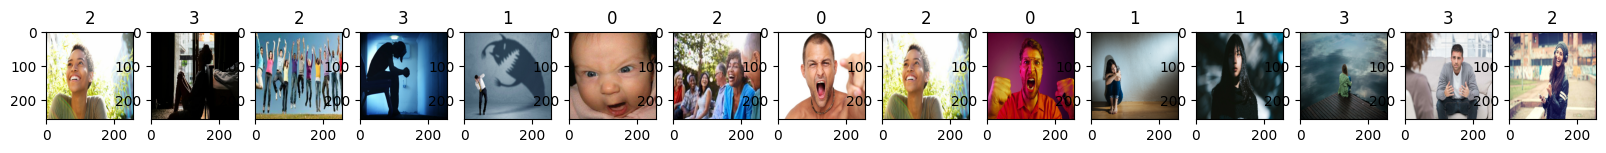

In [276]:
fig, ax = plt.subplots(ncols=15, figsize=(20,20))
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [277]:
batch[0].max()

255.0

In [278]:
data = data.map(lambda x,y: (x/255,y))
data.as_numpy_iterator().next()[0].max()

1.0

In [279]:
#split data
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

print(test_size)

1


In [280]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [281]:
len(test)

1

In [282]:
from tensorflow import keras
from tensorflow.keras import layers



In [283]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')   # Sigmoid activation for depth regression (output range [0, 1])
])

# Compile the model
model.compile(optimizer='adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [284]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 62, 62, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 64)        9280      
                                                                 
 flatten_8 (Flatten)         (None, 230400)           

In [285]:
logdir = "F:\image classification\logs"

In [286]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [290]:

hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
5/5 [==============================] - 13s 2s/step - loss: 0.0652 - accuracy: 0.9875 - val_loss: 0.0312 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 13s 2s/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 13s 2s/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 13s 2s/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 13s 2s/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 13s 2s/step - loss: 0.0085 - accuracy: 0.9937 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 13s 2s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 8/10
5/5 [==================

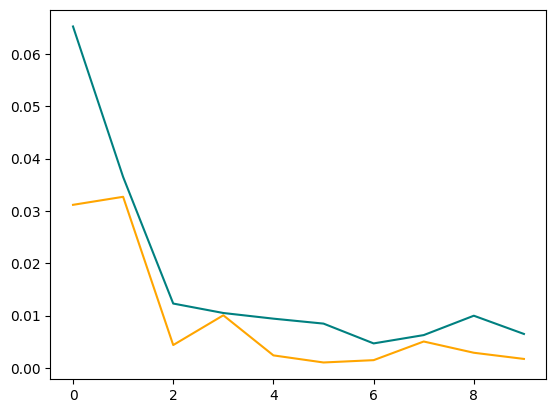

In [291]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label= 'loss')
plt.plot(hist.history['val_loss'], color='orange', label= 'va_loss')
plt.show()

In [292]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [293]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [294]:
len(batch)

2

In [295]:
count=0
y1=[]
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    y1.append(model.predict(X))
    count +=1
    #pre.update_state(y, yhat)
    #re.update_state(y, yhat)
    #acc.update_state(y, yhat)
    

1/1 [==============================] - 0s 475ms/step


In [303]:
c = np.zeros((32))
d= np.zeros((32))
count=0
for i in range(len(y1[0])):
    a  = np.argmax(y1[0][i])
    if y[i]==0:
        b = 'angry'
        d[count] = 0
    elif y[i]==1:
        b = 'fear'
        d[count] = 1
    elif y[i]==2:
        b = 'happy'
        d[count] = 2
    elif y[i]==2:
        b = 'sad'
        d[count] = 3
    if a==0:
        c[count] = 0
        print(i,' ', 'angry', ' ', b )
    elif a==1:
        c[count] = 1
        print(i,' ', 'fear', ' ', b )
    elif a==2:
        c[count] = 2
        print(i,' ', 'happy', ' ', b )
    elif a==3:
        c[count] = 3
        print(i,' ', 'sad', ' ', b )
    count +=1    


0   sad   fear
1   fear   fear
2   happy   happy
3   fear   fear
4   happy   happy
5   angry   angry
6   sad   angry
7   sad   angry
8   happy   happy
9   sad   happy
10   fear   fear
11   happy   happy
12   angry   angry
13   fear   fear
14   happy   happy
15   sad   happy
16   sad   happy
17   sad   happy
18   happy   happy
19   fear   fear
20   happy   happy
21   happy   happy
22   sad   happy
23   happy   happy
24   angry   angry
25   happy   happy
26   happy   happy
27   sad   happy
28   sad   happy
29   angry   angry
30   angry   angry
31   fear   fear


In [299]:
print(c)

[0. 1. 3. 1. 3. 0. 0. 0. 3. 0. 1. 3. 0. 1. 3. 0. 0. 0. 3. 1. 3. 3. 0. 3.
 0. 3. 3. 0. 0. 0. 0. 1.]


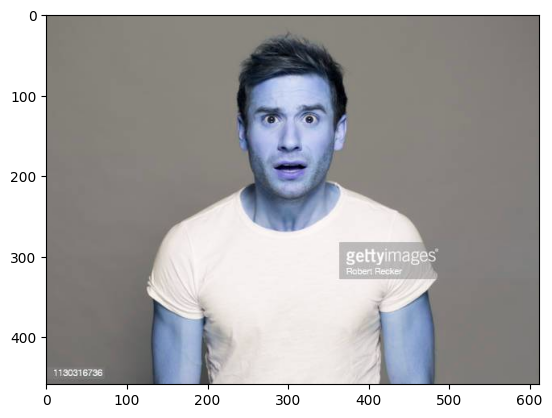

In [325]:
img = cv2.imread('F:\image classification\gettyimages-1130316736-612x612.jpg')
plt.imshow(img)

ext_test = tf.image.resize(img, (256,256))

In [327]:
np.expand_dims(resize, 0)
yhat = model.predict(np.expand_dims(ext_test/255, 0))

1/1 [==============================] - 0s 424ms/step


In [337]:
 
a  = np.argmax(yhat)

if a==0:
    print('angry')
elif a==1:

    print('fear')
elif a==2:

    print('happy')
elif a==3:

    print('sad' )

fear


In [329]:
from tensorflow.keras.models import load_model

In [333]:
model.save(os.path.join('F:\image classification\model', 'emotion_classification_ang_fear_hap_sad.h5'))

In [334]:
new_model = load_model(os.path.join('F:\image classification\model', 'emotion_classification_ang_fear_hap_sad.h5'))

In [335]:
new_model

In [336]:
yhat = new_model.predict(np.expand_dims(ext_test/255, 0))

1/1 [==============================] - 0s 219ms/step
